In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

ID - Identificação

Income - Renda

Limit - Limite de crédito

Rating - Score do Serasa

Age - Idade

Education - Anos de educação

Gender - Gênero

Student - É estudante? (Sim ou Não)

Married - É casado(a)? (Sim ou Não)

Ethnicity - Afro-americano, asiático ou branco

Balance - Saldo médio do cartão de crédito em dólares

Q1. Previsão do Saldo Médio do Cartão de Crédito

Neste case, você deverá aplicar a regressão linear múltipla para estimar o saldo médido do cartão de crédito de clientes de um banco, a partir das demais informações contidas no conjunto de dados (credit_regression.csv), os quais são descritos abaixo. Aplique a regressão linear, utilizando o LinearRegression do sklearn e, também, o OLS do statsmodels.

In [49]:
df = pd.read_csv("C:\\Users\\Fabio\\Desktop\\Data Science\\banco_dados\\credit_regression.csv")

In [50]:
df

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [51]:
df.corr()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
Unnamed: 0,1.000000,0.037203,0.024172,0.021985,-0.036304,0.058603,-0.001415,0.006064
Income,0.037203,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.024172,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.021985,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.036304,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.058603,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.001415,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.006064,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


In [52]:
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [53]:
df_caso = df.drop(['Limit', 'Income', 'Unnamed: 0', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity'], axis=1)

In [54]:
df_caso

,Rating,Balance
0,283,333
1,483,903
2,514,580
3,681,964
4,357,331
...,...,...
395,307,560
396,296,480
397,321,138
398,192,0


In [55]:
df_caso.describe()

,Rating,Balance
count,400.000000,400.000000
mean,354.940000,520.015000
std,154.724143,459.758877
min,93.000000,0.000000
25%,247.250000,68.750000
50%,344.000000,459.500000
75%,437.250000,863.000000
max,982.000000,1999.000000


In [56]:
df_caso.corr()

,Rating,Balance
Rating,1.000000,0.863625
Balance,0.863625,1.000000


In [57]:
df_caso.shape

(400, 2)

<AxesSubplot:>

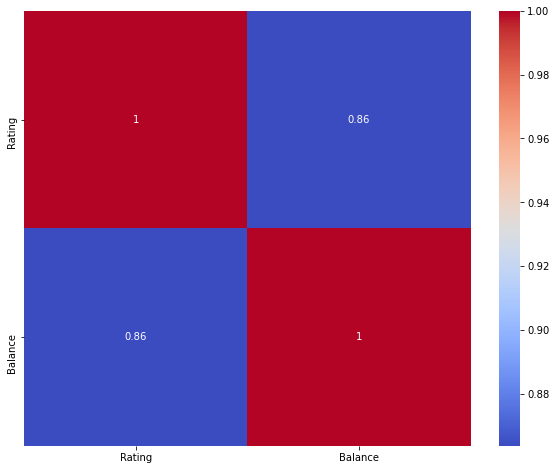

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_caso.corr(), annot=True, cmap="coolwarm")

In [59]:
df_caso.columns

Index(['Rating', 'Balance'], dtype='object')

In [60]:
X = df_caso[['Rating']]
y= df_caso["Balance"]

In [61]:
lr = LinearRegression().fit(X, y)

In [133]:
y_est = lr.predict(X)

(400,)

In [63]:
y_est[:5]

array([ 335.39967085,  848.64773632,  928.20118647, 1356.76332113,
        525.30145507])

In [64]:
lr.score(X, y)

0.7458484180585037

In [65]:
r2_score(y, y_est)

0.7458484180585037

In [66]:
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()

C:\Users\Fabio\python_financas\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):          1.90e-120
Time:                        22:21:28   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model.resid

0       -2.399671
1       54.352264
2     -348.201186
3     -392.763321
4     -194.301455
          ...    
395    163.010561
396    111.239205
397   -294.916803
398   -101.871801
399    291.856606
Length: 400, dtype: float64

In [69]:
model.resid.mean()

6.934897101018578e-14

<AxesSubplot:ylabel='Count'>

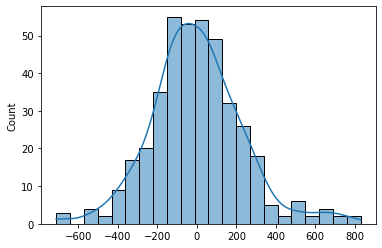

In [70]:
sns.histplot(data=model.resid, kde=True)

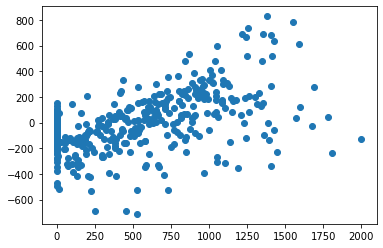

In [71]:
plt.scatter(y, model.resid)

<AxesSubplot:>

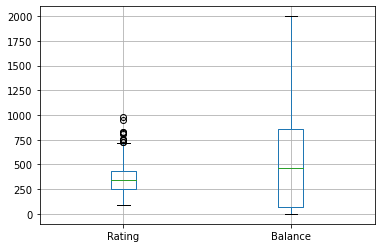

In [122]:
df_caso.boxplot()

Não há outliers consideráveis para serem retirados, os outliers considerados do gráfico fazem parte do IQR do Saldo médio do cartão de crédito em dólares

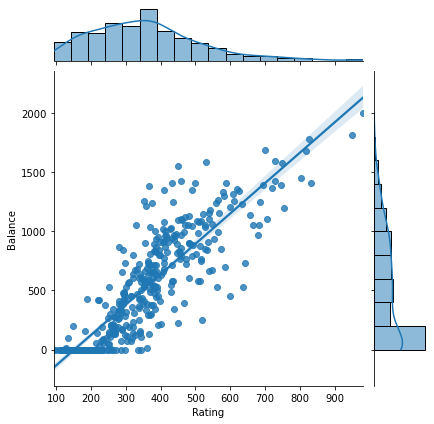

In [125]:
sns.jointplot(x=(df_caso['Rating']), y=(df_caso['Balance']), kind='reg')

In [131]:
df["Balance"].shape

(400,)

In [132]:
y_est.shape

(10,)

In [136]:
df_caso["Saldo estimado"] = y_est

In [137]:
df_caso

,Rating,Balance,Saldo estimado
0,283,333,335.399671
1,483,903,848.647736
2,514,580,928.201186
3,681,964,1356.763321
4,357,331,525.301455
...,...,...,...
395,307,560,396.989439
396,296,480,368.760795
397,321,138,432.916803
398,192,0,101.871801
